In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
df = pd.read_csv("../btcNews_Data.csv")

In [3]:
df.head()

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
0,12/07/2015,bitcoin the next logical step in the rise of u...,the blockchain towards crypto sovereignty ...,coinbase outage is a reminder to not store bit...,2015 q1 bitcoin vc investment trumps the numbe...,future use cases for blockhain technology dis...,poloniex leaves new york due to bitlicense ...,what is bitcoin xt amp what is happening wit...,mainstream medias failure with bitcoin reporti...,bitcoin a technological innovation restoring ...,...,the avalanche web wallet experienced an outag...,ant group and tencent have all been key pla...,opponents of the tax on crypto profits outnum...,f2pool was the top bitcoin mining operation w...,310.4,292.0,315.9,291.3,120.70K,6.33%
1,13/07/2015,bitgive foundation announces new initiatives a...,bitcoin in review interesting trends in q1 of...,cloudminr user accounts hacked data sold for ...,the block size debate and sock puppet accusa...,future use cases for blockchain technology p...,the low hanging fruit of bitcoin adoption vi...,scotland has plans to develop its own digital ...,bitcoin charitable donations the tables are s...,peek inside coinpoint a full service bitcoin ...,...,while consumer interest in cryptocurrency ...,there are particular cryptos that are in my ...,of the 75 enforcement actions 43 were litiga...,NaN,290.4,310.4,310.9,276.9,146.85K,-6.47%
2,14/07/2015,keynote 2015 harnessing the distributed ledge...,cash back vs bitcoin why bitcoin can be super...,force or mathematics fiat vs cryptocurrency ...,the 9 most visited websites in the bitcoin eco...,future use cases of blockchain technology dec...,the kids keep asking bitcoin are we there ye...,barclays bank they come for the blockchain b...,back to the future bitcoin as a vehicle for i...,changing the blockchain pr image for average c...,...,the tremendous interest we are seeing in thes...,palantir technologies peter thiel has been a ...,another reason why the bitcoin hashrate is dr...,NaN,287.0,290.4,297.0,285.2,60.62K,-1.17%
3,15/07/2015,patrick byrne says will be able to replace w...,bitcoin based transparent marketplaces can pre...,vladimir putin speaks out in favor of bitcoin ...,apple pay same old ball amp chain bitcoin,what happens to bitcoin miners when all coins ...,banks could be working on blockchain based dig...,you can now find the bitcoin based debit card ...,accepted here 10 000 coinify merchants take...,e coin bitcoin cards an interview with georgy...,...,here and now the perspective is shifted bac...,binance is being probed by the u s department...,NaN,NaN,283.4,287.0,292.9,283.2,59.58K,-1.23%
4,16/07/2015,2015 q1 bitcoin investment trumps 2014 numbers...,california wants to suspend uber in attempt to...,kraken announces new fee structure bitcoin,fintech the rehashing of old payment methods...,purse io offers plenty of bitcoin arbitrage op...,it looks like may be our newest user over at...,we are proud to do our part to help scale bitc...,today we are going to have mr patrick byrne c...,the governor of delaware has announced the ...,...,the company is already accepting bitcoin so ...,the learning course is also being used to prep...,NaN,NaN,276.6,283.4,290.8,273.3,121.32K,-2.41%


In [4]:
len(df)

2146

In [5]:
df.dtypes


date         object
top_0        object
top_1        object
top_2        object
top_3        object
top_4        object
top_5        object
top_6        object
top_7        object
top_8        object
top_9        object
top_10       object
top_11       object
top_12       object
top_13       object
top_14       object
top_15       object
top_16       object
top_17       object
top_18       object
top_19       object
top_20       object
top_21       object
top_22       object
top_23       object
top_24       object
top_25       object
top_26       object
top_27       object
top_28       object
top_29       object
top_30       object
top_31       object
top_32       object
top_33       object
top_34       object
top_35       object
price       float64
open        float64
high        float64
low         float64
vol.         object
change %     object
dtype: object

In [6]:
df.isna().sum()

date           0
top_0          0
top_1         27
top_2         99
top_3        297
top_4        517
top_5        764
top_6        990
top_7       1166
top_8       1304
top_9       1404
top_10      1476
top_11      1559
top_12      1644
top_13      1712
top_14      1779
top_15      1842
top_16      1877
top_17      1917
top_18      1949
top_19      1980
top_20      2003
top_21      2036
top_22      2064
top_23      2080
top_24      2093
top_25      2108
top_26      2118
top_27      2124
top_28      2127
top_29      2130
top_30      2134
top_31      2135
top_32      2135
top_33      2141
top_34      2143
top_35      2145
price          0
open           0
high           0
low            0
vol.           0
change %       0
dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
df_1 = df.set_index('date')
# Remove '%' and convert 'change %' to a numeric column
df_1['change %'] = df_1['change %'].str.replace('%', '').astype(float)

In [8]:
# Function to convert 'K' and 'M' to numeric values
def convert_to_numeric(val):
    if isinstance(val, str):
        if 'K' in val:
            return float(val.replace('K', '')) * 1e3
        elif 'M' in val:
            return float(val.replace('M', '')) * 1e6
    return float(val)
# Apply the conversion to the 'vol.' column
df_1['vol.'] = df_1['vol.'].apply(convert_to_numeric)

In [9]:
df_1.sample()

,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,...,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
date,,,,,,,,,,,,,,,,,,,,,
2020-12-12,microstrategy completes 650 million capital r...,bitcoin is a 10x improvement on gold and w...,the central bank of nigeria cbn has said the...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18808.9,18026.7,18936.2,18025.1,71370.0,4.36


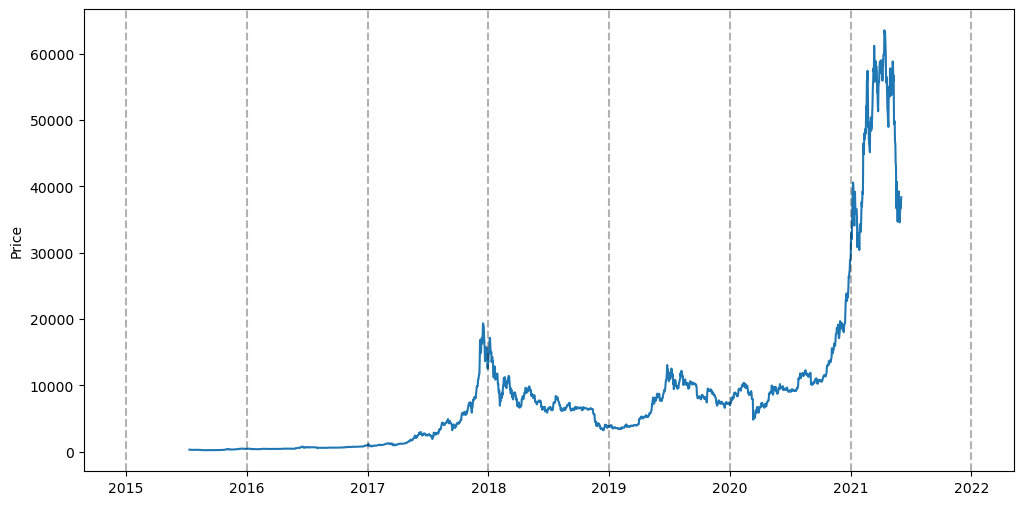

In [11]:
plt.figure(figsize= (12,6))
plt.plot(df_1.price)
plt.ylabel('Price')
for year in range (2015, 2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color = 'k', linestyle = '--', alpha=0.3)

In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2146 entries, 2015-07-12 to 2021-06-03
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   top_0     2146 non-null   object 
 1   top_1     2119 non-null   object 
 2   top_2     2047 non-null   object 
 3   top_3     1849 non-null   object 
 4   top_4     1629 non-null   object 
 5   top_5     1382 non-null   object 
 6   top_6     1156 non-null   object 
 7   top_7     980 non-null    object 
 8   top_8     842 non-null    object 
 9   top_9     742 non-null    object 
 10  top_10    670 non-null    object 
 11  top_11    587 non-null    object 
 12  top_12    502 non-null    object 
 13  top_13    434 non-null    object 
 14  top_14    367 non-null    object 
 15  top_15    304 non-null    object 
 16  top_16    269 non-null    object 
 17  top_17    229 non-null    object 
 18  top_18    197 non-null    object 
 19  top_19    166 non-null    object 
 20  top_20    14

In [13]:
df_1.describe()

,price,open,high,low,vol.,change %
count,2146.000000,2146.000000,2146.000000,2146.000000,2.146000e+03,2146.000000
mean,8649.910485,8632.001165,8896.109925,8336.822973,5.160116e+05,0.303504
std,12071.304908,12055.215223,12454.354964,11588.466405,1.311607e+06,3.975095
min,211.400000,211.400000,226.600000,196.300000,2.400000e+03,-39.180000
25%,896.000000,894.600000,914.700000,871.800000,6.817250e+04,-1.180000
50%,6394.950000,6391.000000,6528.800000,6278.900000,1.446900e+05,0.210000
75%,9578.575000,9568.525000,9750.700000,9325.050000,5.157025e+05,1.817500
max,63540.900000,63544.200000,64778.000000,62067.500000,2.026000e+07,25.560000


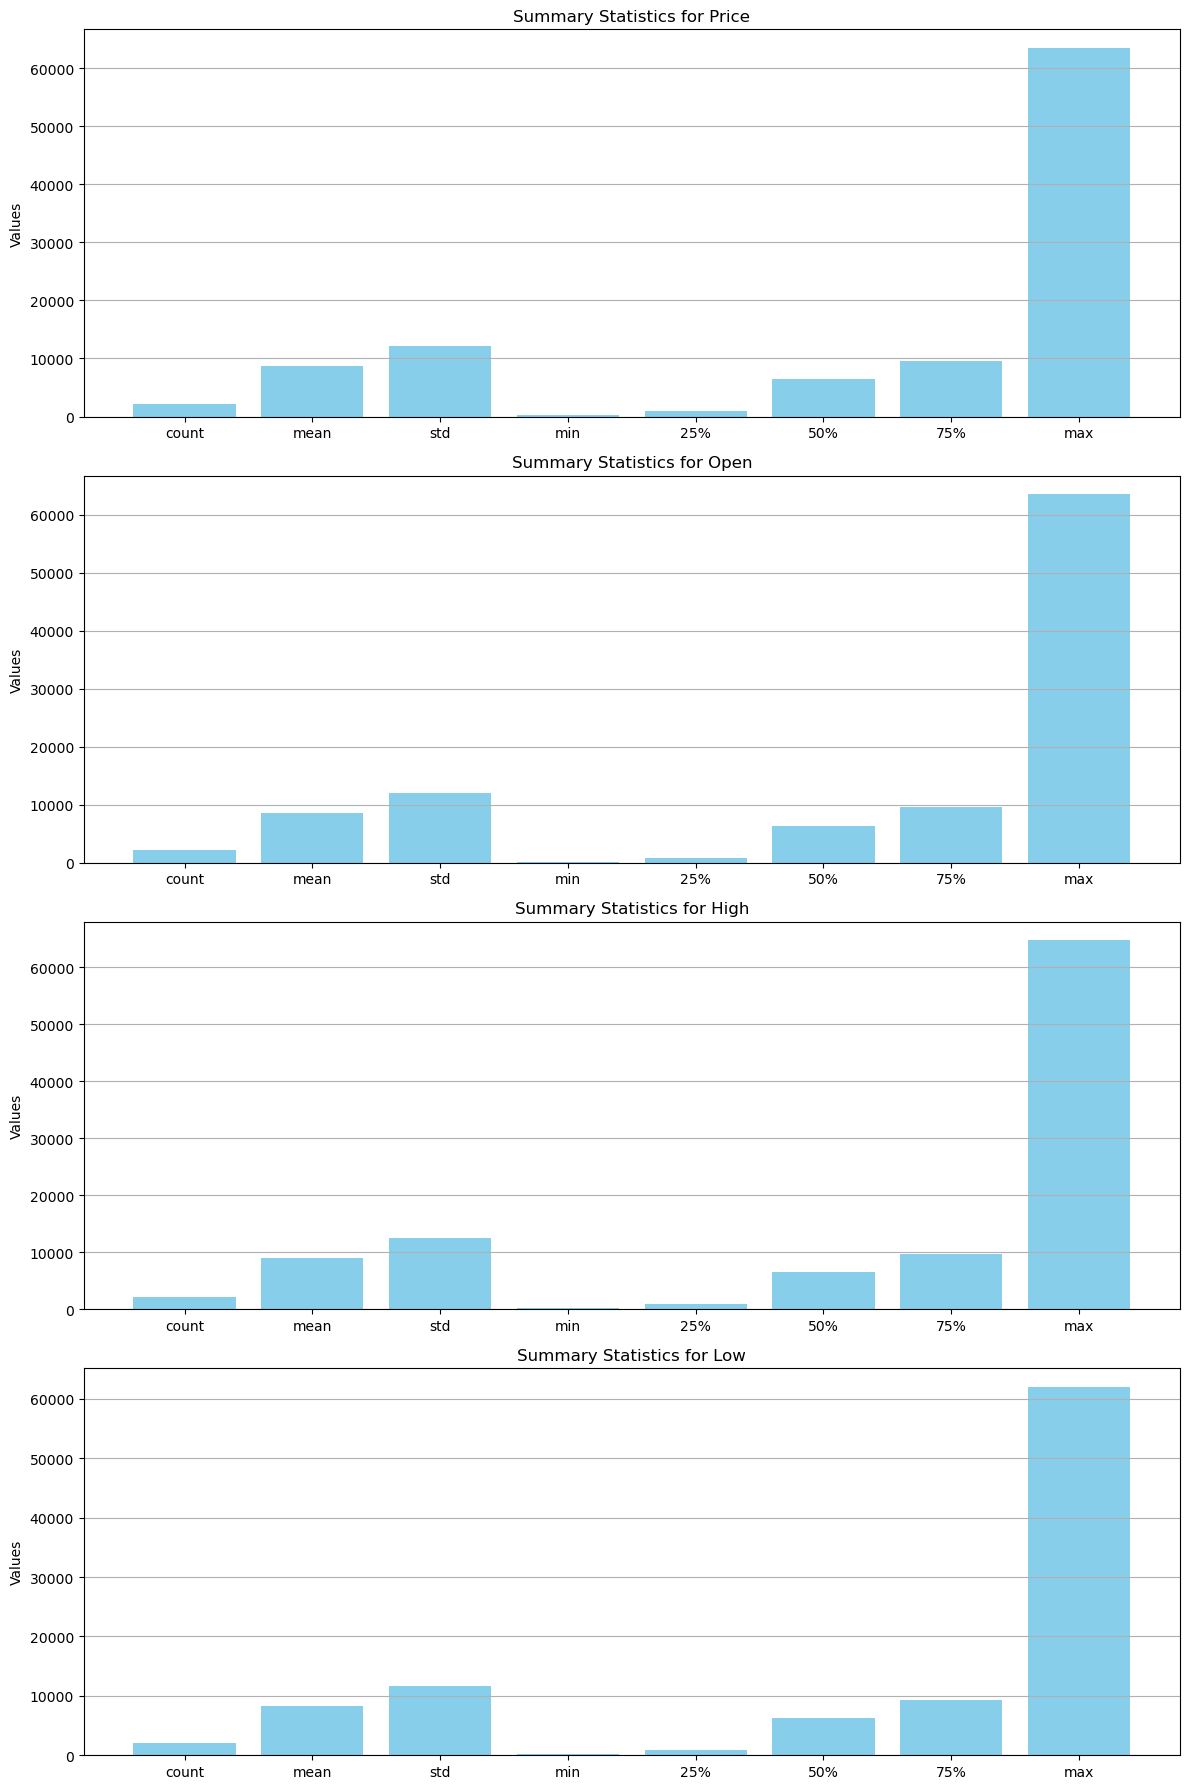

In [14]:
summary_stats = df_1[['price', 'open', 'high', 'low']].describe()

# Transpose the summary statistics to make it easier to plot
summary_stats = summary_stats.T

# Set up the subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 18))

# Create individual plots for each metric
for i, column in enumerate(summary_stats.index):
    axes[i].bar(summary_stats.columns, summary_stats.loc[column], color='skyblue')
    axes[i].set_title(f'Summary Statistics for {column.capitalize()}')
    axes[i].set_ylabel('Values')
    axes[i].grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()

### parametric and Non Parametricm

For normally distributed data, parametric like t-test, Anova, preason corelation

#### Looking into normal distribution

In [15]:
# Define the bins and labels based on the min and max values
bins = [-40, -30, -20, -10, -5, 0, 5, 10, 20, 30]  # Adjust for your data range
labels = ['-40% to -30%', '-30% to -20%', '-20% to -10%', '-10% to -5%', 
          '-5% to 0%', '0% to 5%', '5% to 10%', '10% to 20%', '20% to 30%']

# Bin the 'change %' data
df_1['change % bin'] = pd.cut(df_1['change %'], bins=bins, labels=labels)


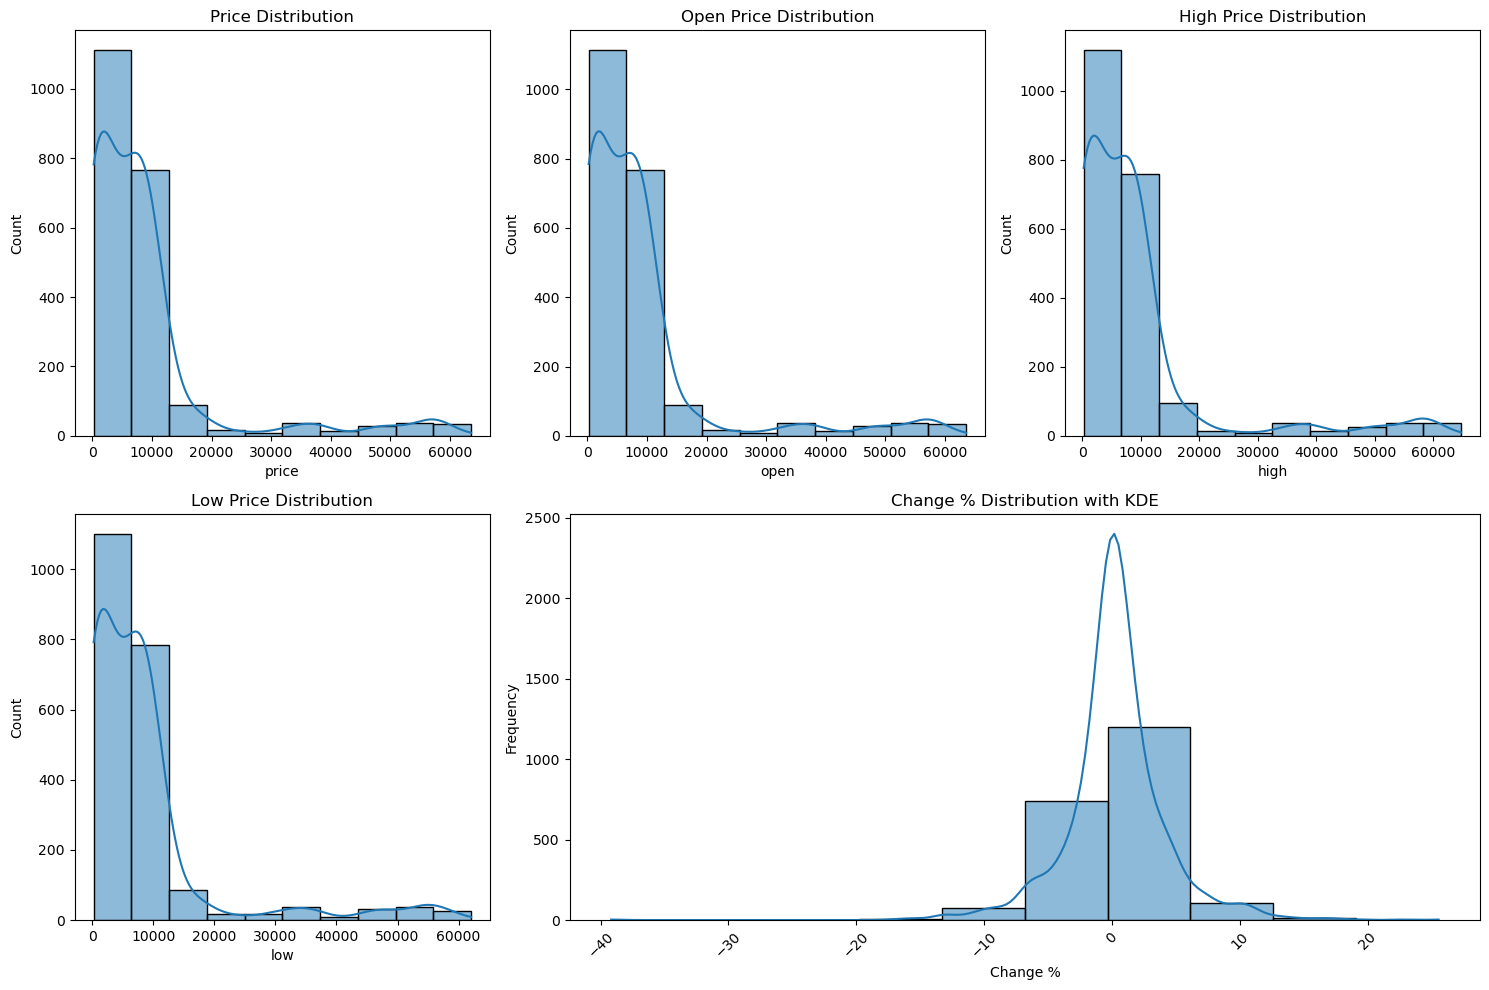

In [16]:
import matplotlib.gridspec as gridspec
# Set up the grid layout (2 rows, 3 columns)
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1])  # Define the grid

# Plot each distribution
ax1 = plt.subplot(gs[0, 0])
sns.histplot(df_1['price'], bins=10, kde=True, ax=ax1)
ax1.set_title('Price Distribution')

ax2 = plt.subplot(gs[0, 1])
sns.histplot(df_1['open'], bins=10, kde=True, ax=ax2)
ax2.set_title('Open Price Distribution')

ax3 = plt.subplot(gs[0, 2])
sns.histplot(df_1['high'], bins=10, kde=True, ax=ax3)
ax3.set_title('High Price Distribution')

ax4 = plt.subplot(gs[1, 0])
sns.histplot(df_1['low'], bins=10, kde=True, ax=ax4)
ax4.set_title('Low Price Distribution')

# Make the 'change %' plot span two columns (1,1 and 1,2)
ax5 = plt.subplot(gs[1, 1:3])  # Span two columns
sns.histplot(df_1['change %'], bins=10, kde=True, ax=ax5)  # Use histplot with KDE=True
ax5.set_title('Change % Distribution with KDE')
ax5.set_xlabel('Change %')
ax5.set_ylabel('Frequency')

# Rotate tick labels without using FixedFormatter
ax5.tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout()

In [17]:
df_1['change % bin'].value_counts()

change % bin
0% to 5%        991
-5% to 0%       824
5% to 10%       132
-10% to -5%     125
10% to 20%       42
-20% to -10%     29
20% to 30%        2
-40% to -30%      1
-30% to -20%      0
Name: count, dtype: int64

In [18]:
grouped_data = [group['price'].values for name, group in df_1.groupby('change % bin') if len(group) > 0]

# Check each group for size and variance
for idx, group in enumerate(grouped_data):
    print(f"Group {idx + 1}: size = {len(group)}, variance = {np.var(group)}")


Group 1: size = 1, variance = 0.0
Group 2: size = 29, variance = 124100002.56380498
Group 3: size = 125, variance = 181864560.08003458
Group 4: size = 824, variance = 142176486.09207904
Group 5: size = 991, variance = 132113801.68381077
Group 6: size = 132, variance = 216380411.6338493
Group 7: size = 42, variance = 146152841.7804535
Group 8: size = 2, variance = 48890161.622499995


In [19]:
filtered_grouped_data = [group for group in grouped_data if len(group) > 1 and np.var(group) > 0]

In [20]:
import scipy.stats as stats

In [21]:
if len(filtered_grouped_data) > 1:
    # Perform one-way ANOVA
    anova_result = stats.f_oneway(*filtered_grouped_data)

    # Degrees of freedom
    df_between = len(filtered_grouped_data) - 1  # df1: Number of groups - 1
    df_within = sum([len(group) for group in filtered_grouped_data]) - len(filtered_grouped_data)  # df2: Total observations - Number of groups
    
    # Calculate critical value (alpha = 0.05)
    alpha = 0.05
    critical_value = stats.f.ppf(1 - alpha, df_between, df_within)

    # Print the results
    print('ANOVA Results:')
    print(f'F-statistic: {anova_result.statistic}')
    print(f'p-value: {anova_result.pvalue}')
    print(f'Critical value (alpha = {alpha}): {critical_value}')
else:
    print("Not enough valid groups with non-zero variance for ANOVA.")

ANOVA Results:
F-statistic: 3.847264595383544
p-value: 0.0008027610128824415
Critical value (alpha = 0.05): 2.102818483756683


ANOVA Results:
F-statistic: 3.847264595383544
p-value: 0.0008027610128824415
Critical value (alpha = 0.05): 2.102818483756683


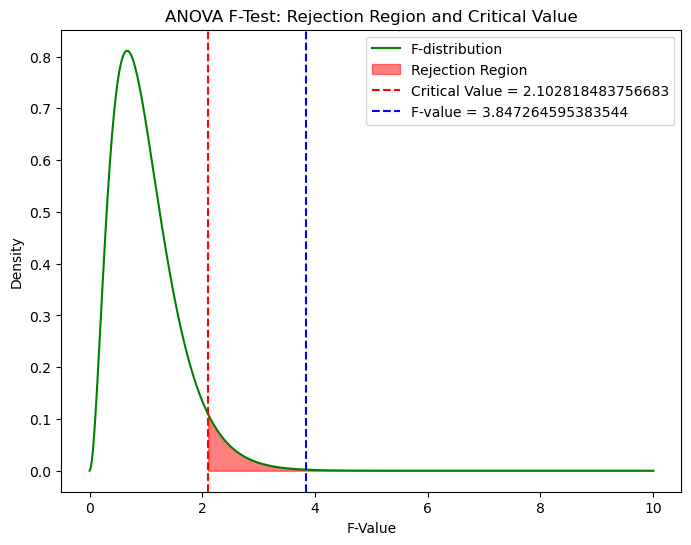

In [22]:

# Assuming filtered_grouped_data is already defined
if len(filtered_grouped_data) > 1:
    # Perform one-way ANOVA
    anova_result = stats.f_oneway(*filtered_grouped_data)

    # Degrees of freedom
    df_between = len(filtered_grouped_data) - 1  # df1: Number of groups - 1
    df_within = sum([len(group) for group in filtered_grouped_data]) - len(filtered_grouped_data)  # df2: Total observations - Number of groups
    
    # Calculate critical value (alpha = 0.05)
    alpha = 0.05
    critical_value = stats.f.ppf(1 - alpha, df_between, df_within)

    # Print the results
    print('ANOVA Results:')
    print(f'F-statistic: {anova_result.statistic}')
    print(f'p-value: {anova_result.pvalue}')
    print(f'Critical value (alpha = {alpha}): {critical_value}')

    # Calculate x for F-distribution
    # Here we set an upper limit for x. You can adjust this based on your needs.
    x_max = max(critical_value + 5, 10)  # Ensures x extends beyond the critical value
    x = np.linspace(0, x_max, 500)  # Create x values

    # F-distribution PDF
    y = stats.f.pdf(x, df_between, df_within)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='F-distribution', color='green')

    # Highlight the rejection region
    plt.fill_between(x, 0, y, where=(x >= critical_value), color='red', alpha=0.5, label='Rejection Region')

    # Mark the critical value and F-value
    plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical Value = {critical_value}')
    plt.axvline(anova_result.statistic, color='blue', linestyle='--', label=f'F-value = {anova_result.statistic}')

    # Add labels and title
    plt.title('ANOVA F-Test: Rejection Region and Critical Value')
    plt.xlabel('F-Value')
    plt.ylabel('Density')
    plt.legend()

    # Show the plot
    plt.show()
else:
    print("Not enough valid groups with non-zero variance for ANOVA.")


F value > critical value, <br> we reject the null hypothesis (which states there is no difference between groups). This indicates a significant difference between groups, suggesting that this column is important.

In [23]:
import pandas as pd
from scipy.stats import kruskal


# Extract relevant numeric columns for comparison
numeric_columns = ['price', 'open', 'high', 'low', 'vol.']
groups = [df_1[col].values for col in numeric_columns]

# Perform Kruskal-Wallis test
stat, p_value = kruskal(*groups)

print(f"Kruskal-Wallis H-statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the groups (reject H0).")
else:
    print("There is no significant difference between the groups (fail to reject H0).")


Kruskal-Wallis H-statistic: 4922.78557560026
P-value: 0.0
There is a significant difference between the groups (reject H0).


### Looking for the outlier

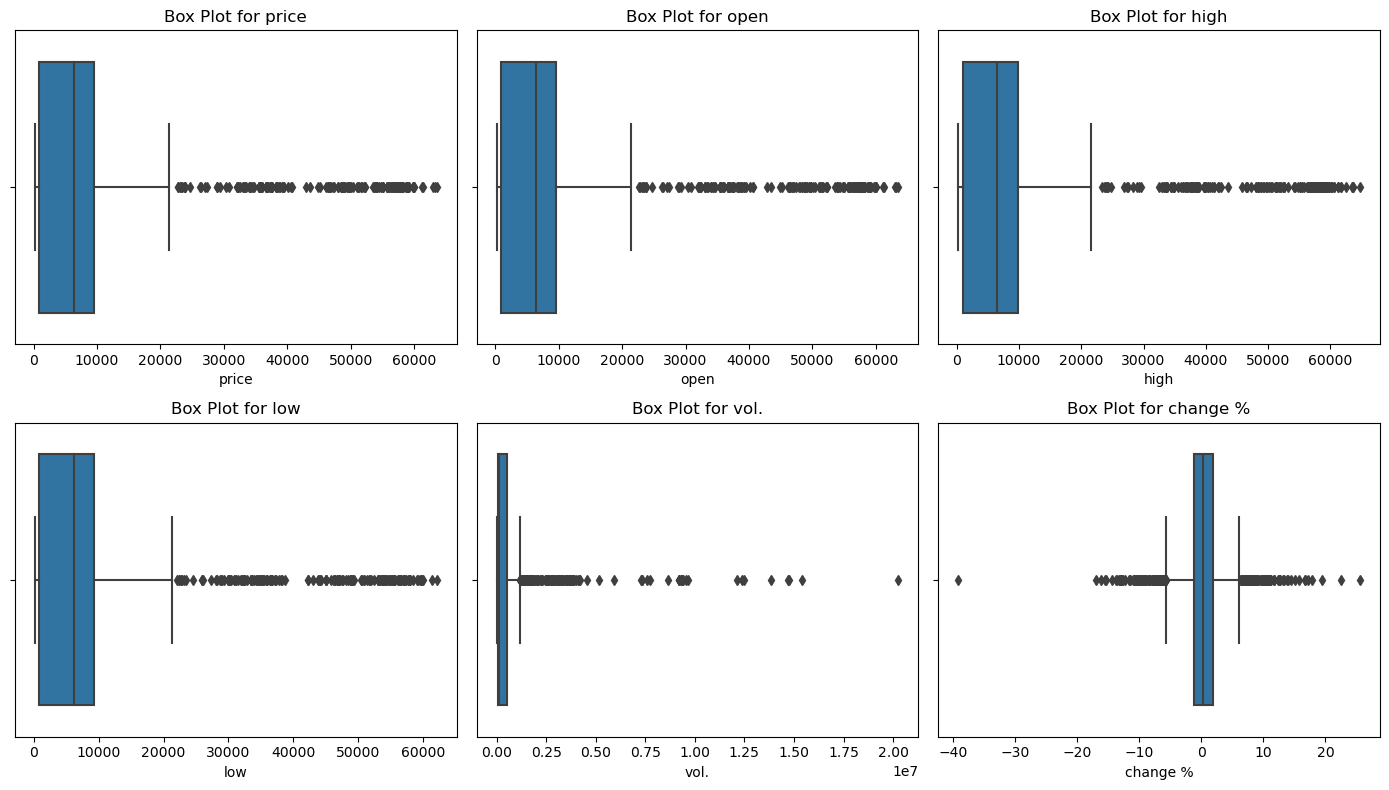

In [24]:
# Assuming your dataset is loaded into a DataFrame called 'data'

# Visualizing with box plots for numeric columns
numeric_cols = ['price', 'open', 'high', 'low', 'vol.', 'change %']
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df_1[col])
    plt.title(f'Box Plot for {col}')
plt.tight_layout()
plt.show()

# Z-score method for detecting outliers in 'price'
df_1['zscore_price'] = (df_1['price'] - df_1['price'].mean()) / df_1['price'].std()
outliers_zscore_price = df_1[df_1['zscore_price'].abs() > 3]

# IQR method for detecting outliers in 'price'
Q1 = df_1['price'].quantile(0.25)
Q3 = df_1['price'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr_price = df_1[(df_1['price'] < (Q1 - 1.5 * IQR)) | (df_1['price'] > (Q3 + 1.5 * IQR))]

# Similarly, you can repeat the Z-score and IQR methods for other numeric columns like 'vol.' or 'change %'


### Moving Averages - Simple Moving Average and Exponential Moving Average

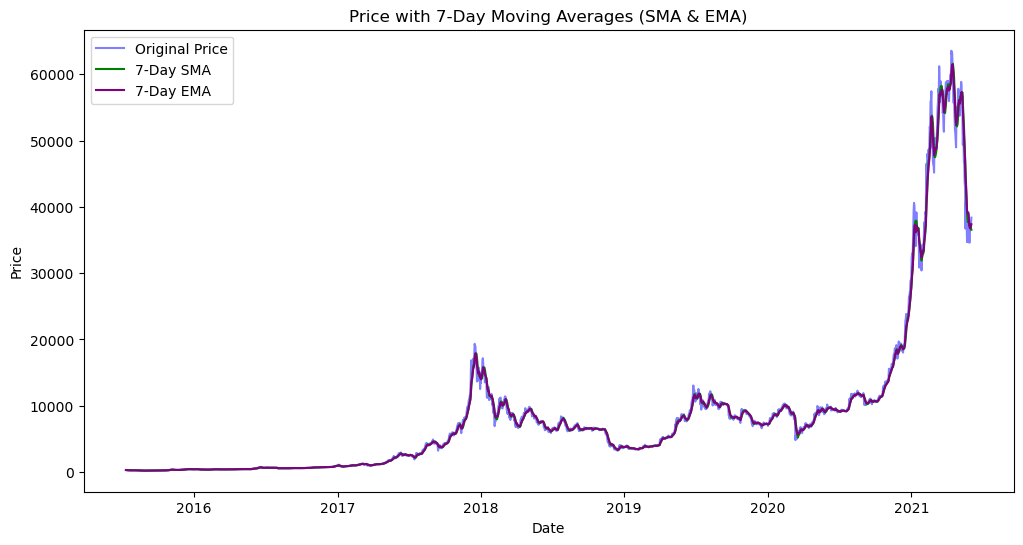

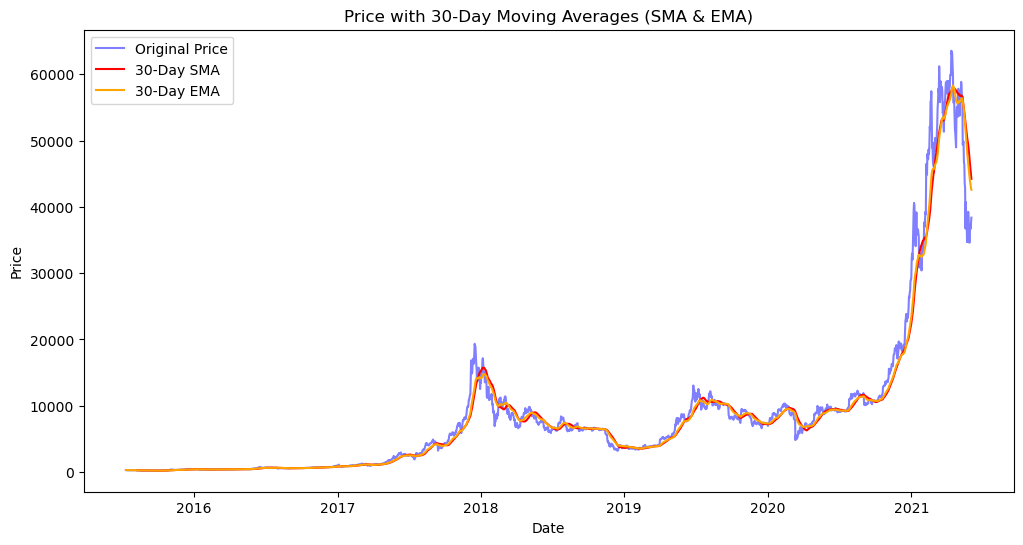

In [25]:

# Simple Moving Average (SMA)
df_1['SMA_7'] = df_1['price'].rolling(window=7).mean()  # 7-day moving average (short-term)
df_1['SMA_30'] = df_1['price'].rolling(window=30).mean()  # 30-day moving average (long-term)

# Exponential Moving Average (EMA)
df_1['EMA_7'] = df_1['price'].ewm(span=7, adjust=False).mean()  # 7-day exponential moving average (short-term)
df_1['EMA_30'] = df_1['price'].ewm(span=30, adjust=False).mean()  # 30-day exponential moving average (long-term)

# Plotting 7-day Moving Averages (SMA and EMA)
plt.figure(figsize=(12, 6))

# Original data
plt.plot(df_1.index, df_1['price'], label='Original Price', color='blue', alpha=0.5)

# 7-Day Moving Averages
plt.plot(df_1.index, df_1['SMA_7'], label='7-Day SMA', color='green')
plt.plot(df_1.index, df_1['EMA_7'], label='7-Day EMA', color='purple')

# Labels and Legends
plt.title('Price with 7-Day Moving Averages (SMA & EMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting 30-day Moving Averages (SMA and EMA)
plt.figure(figsize=(12, 6))

# Original data
plt.plot(df_1.index, df_1['price'], label='Original Price', color='blue', alpha=0.5)

# 30-Day Moving Averages
plt.plot(df_1.index, df_1['SMA_30'], label='30-Day SMA', color='red')
plt.plot(df_1.index, df_1['EMA_30'], label='30-Day EMA', color='orange')

# Labels and Legends
plt.title('Price with 30-Day Moving Averages (SMA & EMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


### ACF and PACF

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

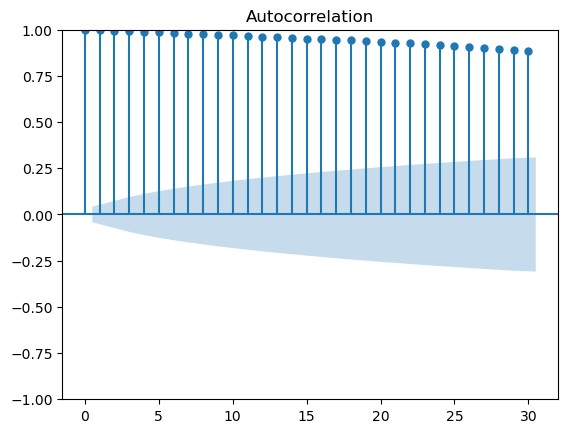

In [27]:
acf_plot = plot_acf(df_1.price, lags= 30)

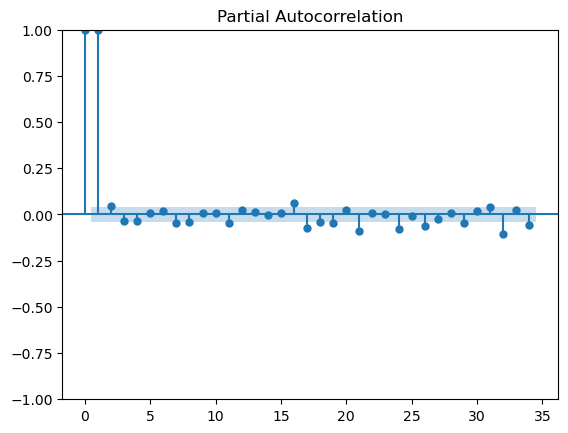

In [28]:
pacf_plot = plot_pacf(df_1.price)

In [29]:
df_1.sample()

,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,...,high,low,vol.,change %,change % bin,zscore_price,SMA_7,SMA_30,EMA_7,EMA_30
date,,,,,,,,,,,,,,,,,,,,,
2019-12-02,vertcoin network sabotaged by another 51 atta...,indian government s institute offers blockchai...,usdz capital group launches usdz stablecoin,a deep dive into polkadot and how dot became a...,some suggest bitcoin is a safe haven from ru...,NaN,NaN,NaN,NaN,NaN,...,7433.8,7173.6,687780.0,-1.33,-5% to 0%,-0.111977,7440.571429,8212.226667,7436.695783,7959.861214


### Is there any seasonal trend?

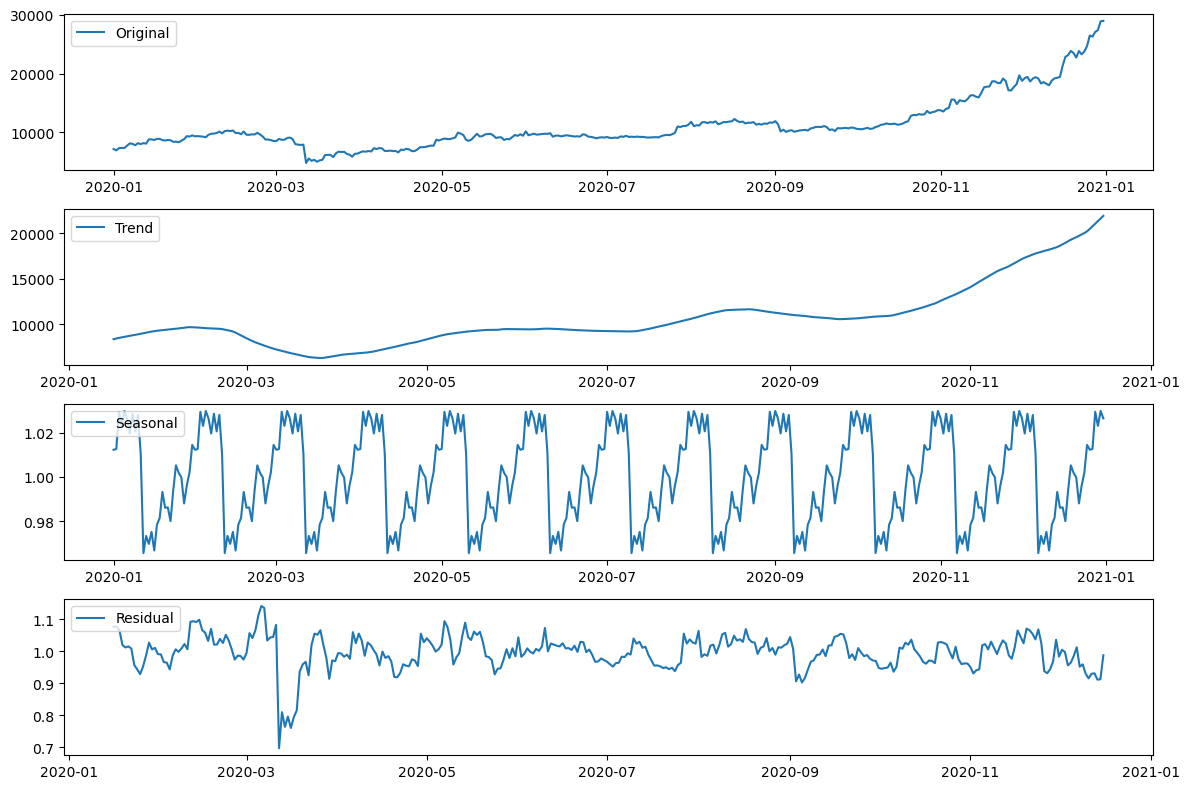

Dickey–Fuller test: p=1.000000


In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

df_1['year'] = df_1.index.year  # Extract year from the index if it's a DateTimeIndex
df_single_year = df_1[df_1['year'] == 2020]

# Decompose the 'high' column
decomposition = seasonal_decompose(df_single_year['price'], model='multiplicative', period=30)  # Adjust the period as needed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_single_year['price'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
print("Dickey–Fuller test: p=%f" % adfuller(df_single_year.price)[1])



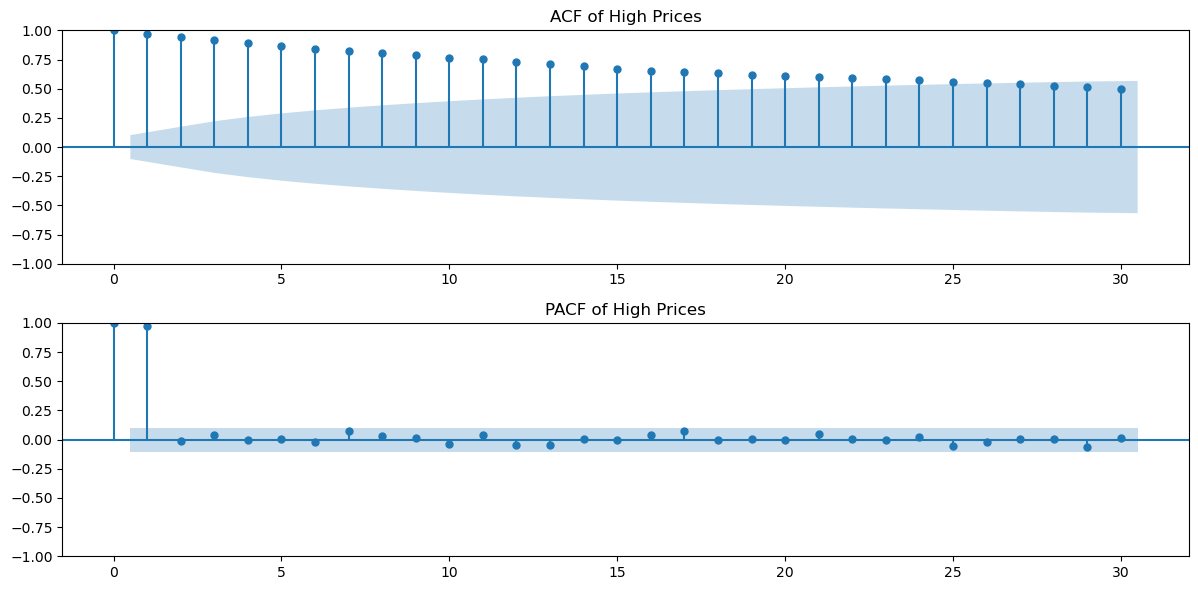

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df_single_year['price'].dropna(), lags=30, ax=plt.gca())
plt.title('ACF of High Prices')

plt.subplot(212)
plot_pacf(df_single_year['price'].dropna(), lags=30, ax=plt.gca())
plt.title('PACF of High Prices')

plt.tight_layout()
plt.show()

if you look into the seasonal decomposition graph, it shows positive but if you analise ACF, it shows nothing on seasonal trend. This means they are contradiction eachother.

In [34]:
df_1.sample()


,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10,top_11,top_12,top_13,top_14,top_15,top_16,top_17,top_18,top_19,top_20,top_21,top_22,top_23,top_24,top_25,top_26,top_27,top_28,top_29,top_30,top_31,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %,change % bin,zscore_price,SMA_7,SMA_30,EMA_7,EMA_30,year
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-17,crackdown on bitcoin hits businesses in bali ...,wallet added to bitpay s list of payment pro...,companies outsource marketing to india amid ba...,the daily binance tests fiat exchange russia...,cottonwood becomes second cryptocurrency atm o...,bittrex pulls out of 31 markets citing regulat...,new exchanger for cryptocurrencies from spee...,as usual in most reddit threads the husband ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11192.3,11357.7,11769.6,9271.3,361800.0,-1.49,-5% to 0%,0.210614,13094.471429,14566.64,12899.853452,14102.272828,2018


In [39]:
df_2 = df_1[['price',	'open',	'high',	'low',	'vol.',	'change %',	'change % bin']]

In [40]:
df_2.sample()


,price,open,high,low,vol.,change %,change % bin
date,,,,,,,
2020-07-07,9256.0,9338.8,9371.2,9209.3,420550.0,-0.89,-5% to 0%


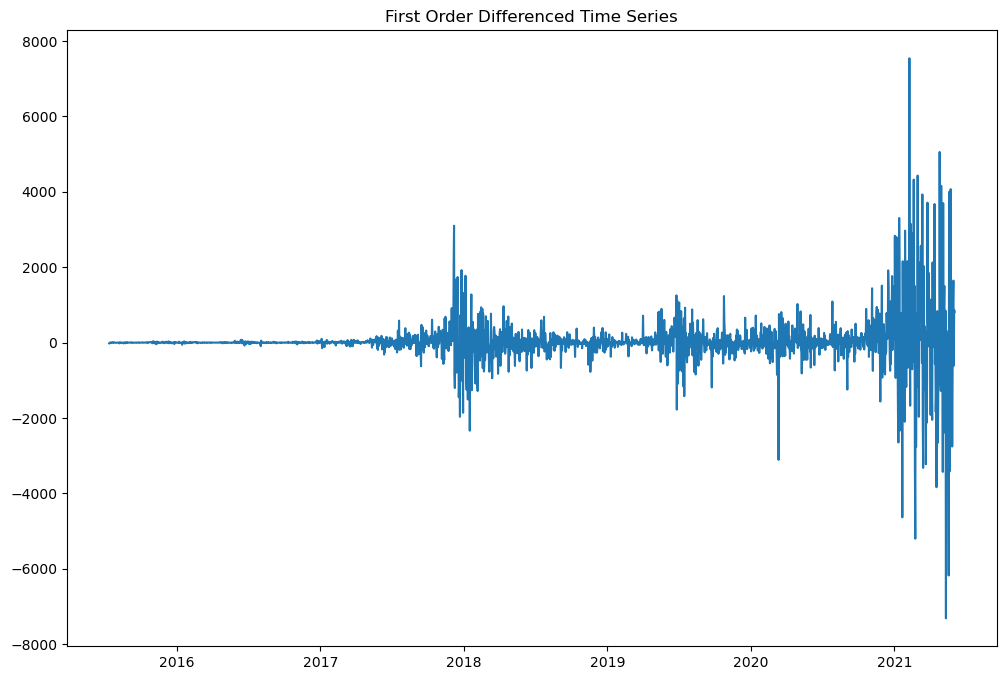

Dickey–Fuller test: p=0.000000


In [44]:
# First-order differencing
df_diff = df_2['price'].diff()

# Drop NaN values resulting from differencing
df_diff = df_diff.dropna()

# Plot the differenced data to visually inspect it
plt.figure(figsize=(12, 8))
plt.plot(df_diff)
plt.title('First Order Differenced Time Series')
plt.show()
print("Dickey–Fuller test: p=%f" % adfuller(df_diff)[1])

In [57]:
adf_result = adfuller(df_diff)

# Extract the ADF statistic and p-value
adf_statistic = adf_result[0]
p_value = adf_result[1]

# Print the ADF statistic and p-value with formatting to show the full number
print(f"ADF Statistic: {adf_statistic:.10f}")
print(f"p-value: {p_value:.10f}")

# Perform Kruskal-Wallis test
# stat_k, p_value_k = kruskal(df_diff)

# print(f"Kruskal-Wallis H-statistic: {stat_k}")
# print(f"P-value: {p_value_k}")

ADF Statistic: -7.2062276236
p-value: 0.0000000002


<Figure size 1200x800 with 0 Axes>

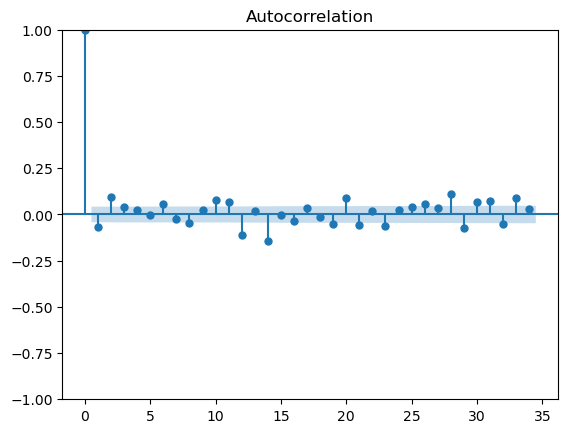

In [55]:
plt.figure(figsize=(12, 8))
plot_acf(df_diff)
plt.show()

In [73]:
df_diff

date
2015-07-13     -20.0
2015-07-14      -3.4
2015-07-15      -3.6
2015-07-16      -6.8
2015-07-17       3.0
2015-07-18      -5.6
2015-07-19      -0.8
2015-07-20       4.5
2015-07-21      -2.6
2015-07-22       1.4
2015-07-23      -1.0
2015-07-24      12.9
2015-07-25       0.3
2015-07-26       3.1
2015-07-27       1.2
2015-07-28       0.7
2015-07-29      -5.3
2015-07-30      -1.4
2015-07-31      -3.3
2015-08-01      -3.2
2015-08-02       0.9
2015-08-03       0.2
2015-08-04       2.7
2015-08-05      -2.6
2015-08-06      -3.7
2015-08-07      -0.1
2015-08-08     -19.3
2015-08-09       5.3
2015-08-10      -0.6
2015-08-11       5.7
2015-08-12      -1.3
2015-08-13      -4.3
2015-08-14       1.6
2015-08-15      -4.5
2015-08-17      -3.4
2015-08-18     -10.4
2015-08-19     -20.7
2015-08-20       8.7
2015-08-21      -2.3
2015-08-22      -2.9
2015-08-23      -2.7
2015-08-24     -15.4
2015-08-25       9.1
2015-08-26       4.5
2015-08-27      -2.3
2015-08-28       8.9
2015-08-29      -3.1
2015-08-

In [74]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA with first-order differencing (d=1)
model = ARIMA(df_diff, order=(1, 1, 19))  # d=1 for first-order differencing

# Fit the model
model_fit = model.fit()

# Summary of the ARIMA model
print(model_fit.summary())


/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starti

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 2145
Model:                ARIMA(1, 1, 19)   Log Likelihood              -16869.180
Date:                Sat, 12 Oct 2024   AIC                          33780.360
Time:                        11:12:10   BIC                          33899.439
Sample:                             0   HQIC                         33823.930
                               - 2145                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9942      0.005   -186.799      0.000      -1.005      -0.984
ma.L1         -0.0761      0.011     -6.707      0.000      -0.098      -0.054
ma.L2         -0.9035      0.011    -78.735      0.0

/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


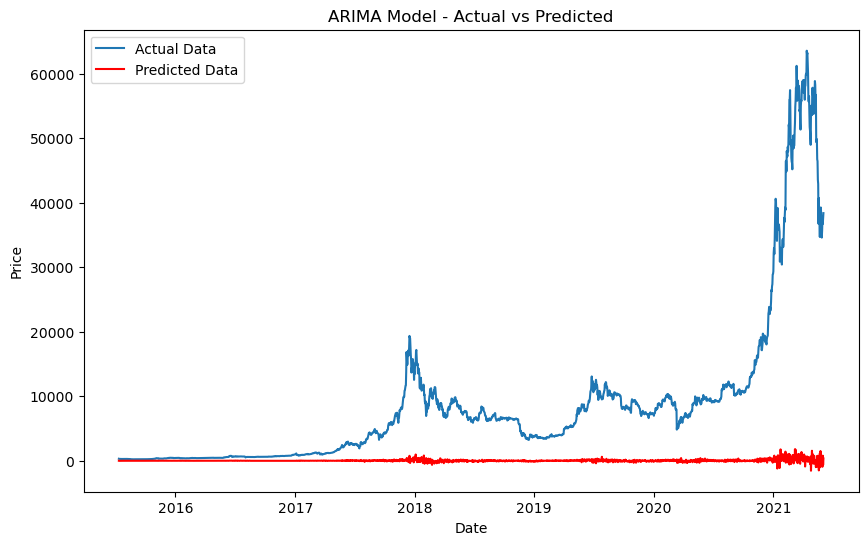

In [78]:
# Ensure the index is a datetime index
df_2.index = pd.to_datetime(df_2.index)
start_index = df_2.index.get_loc(df_2.index[0])
end_index = df_2.index.get_loc(df_2.index[-1])

# # Predict for the entire dataset (in-sample prediction)
# start_index = df_2.index[0]
# end_index = df_2.index[-1]
predictions = model_fit.predict(start=start_index, end=end_index, typ='levels')

# Plot the actual data and predictions
plt.figure(figsize=(10,6))

# Plot the actual data
plt.plot(df_2.index, df_2['price'], label='Actual Data')

# Plot the predicted data
plt.plot(df_2.index, predictions, label='Predicted Data', color='red')

# Add labels and legend
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

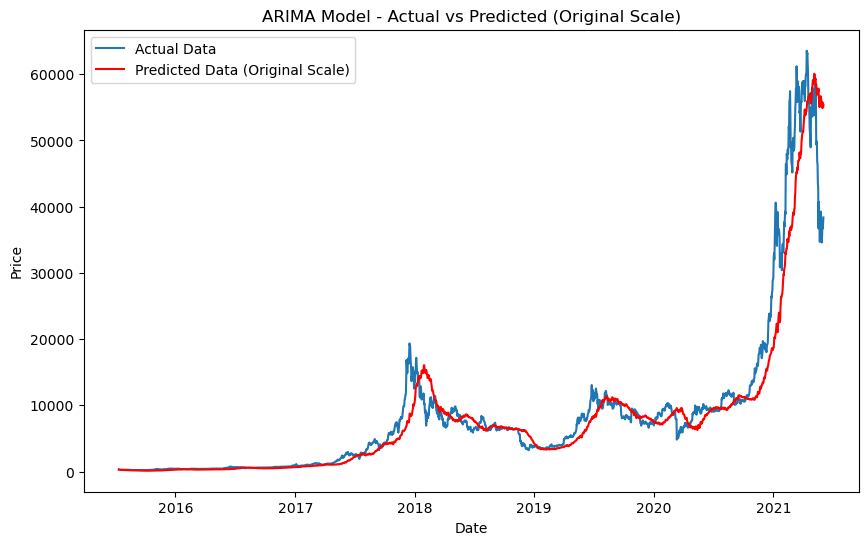

In [79]:
# Get the last observed value from the original (non-differenced) series before differencing
last_original_value = df_2['price'].iloc[-len(df_diff) - 1]  # Adjust to match where differencing began

# Reverse the differencing: cumulative sum of predictions, adding back the last observed value
predictions_original_scale = predictions.cumsum() + last_original_value

# Plot the actual data and reverse differenced predictions
plt.figure(figsize=(10,6))

# Plot the actual data
plt.plot(df_2.index, df_2['price'], label='Actual Data')

# Plot the predicted data (reversed from differenced scale)
plt.plot(df_2.index[-len(predictions_original_scale):], predictions_original_scale, label='Predicted Data (Original Scale)', color='red')

# Add labels and legend
plt.title('ARIMA Model - Actual vs Predicted (Original Scale)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

In [69]:
from sklearn.model_selection import train_test_split

# Assume df_1['price'] contains the time series data
data = df_2['price']
train_size = int(len(data) * 0.5)

train, test = data[:train_size], data[train_size:]

# Fit the ARIMA model on the training data (replace p, d, q with your values)
model = ARIMA(train, order=(1, 1, 19))  # d=1 for first differencing

# Fit the model
model_fit = model.fit()



/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


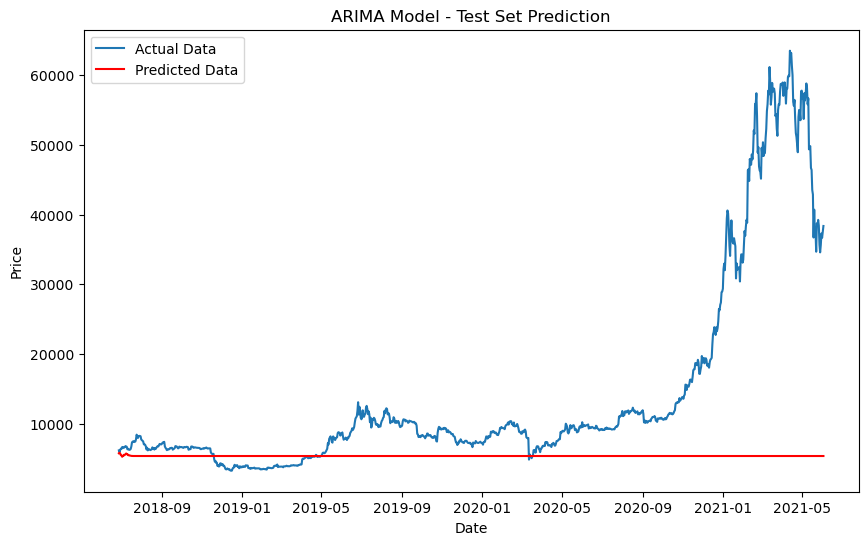

In [71]:
start_index = len(train)  # Start from where the test set begins
end_index = len(train) + len(test) - 1  # End at the last test data point
predictions = model_fit.predict(start=start_index, end=end_index, typ='levels')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot the actual values (test set)
plt.plot(test.index, test, label='Actual Data')

# Plot the predicted values (for the test set)
plt.plot(test.index, predictions, label='Predicted Data', color='red')

# Add labels and legend
plt.title('ARIMA Model - Test Set Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/SandeshShrestha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction resul

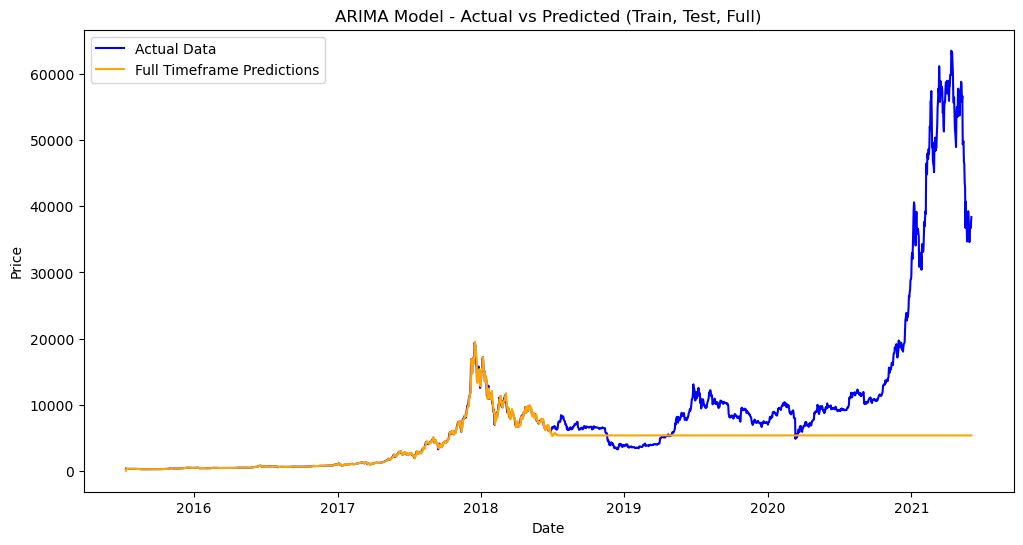

In [70]:
# Predict for the training set (in-sample predictions)
train_predictions = model_fit.predict(start=0, end=len(train) - 1, typ='levels')

# Predict for the test set (out-of-sample predictions)
test_predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Predict the entire time frame (train + test)
full_predictions = model_fit.predict(start=0, end=len(data) - 1, typ='levels')

# Plot actual data, train predictions, test predictions, and full predictions
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(data.index, data, label='Actual Data', color='blue')

# Plot in-sample predictions (train set)
# plt.plot(train.index, train_predictions, label='Train Predictions', color='green')

# Plot out-of-sample predictions (test set)
# plt.plot(test.index, test_predictions, label='Test Predictions', color='red')

# Plot full predictions (entire time frame)
plt.plot(data.index, full_predictions, label='Full Timeframe Predictions', color='orange')


# Add labels, title, and legend
plt.title('ARIMA Model - Actual vs Predicted (Train, Test, Full)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()
